## Telecom Churn

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Understanding the Business Objective

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful

### Business Understanding
To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### 1. Data Understanding

In [289]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report,confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
sns.set_style("whitegrid")

In [290]:
# dataset
#import dataset
telecom_df=pd.read_csv("C:/Users/jigyasu/Desktop/ML-All/Assignment_Solution/Telecom Churn Assignment-Jigyasu/telecom_churn_data.csv")
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [291]:
#Checking the shape of the data set. It consists of 99999 rows and 226 columns.
telecom_df.shape

(99999, 226)

In [292]:
#Checking the info of each column of our dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [293]:
#Checking the null values in the dataset
df=((telecom_df.isnull().sum()/len(telecom_df.index))*100).sort_values(ascending=False)
df

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

### 2. EDA

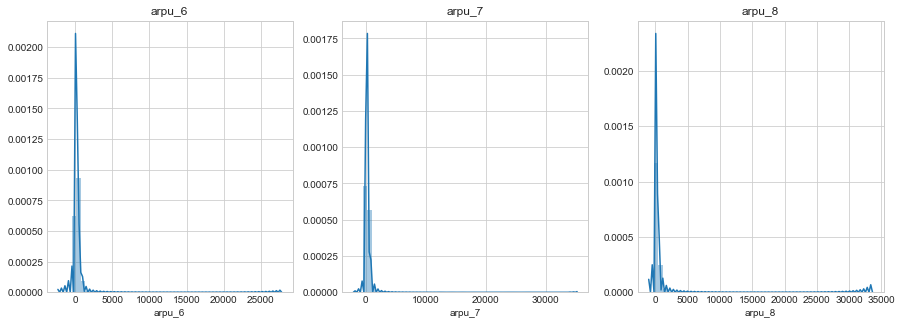

In [294]:
#Plotting the average revenue per user for 6th, 7th and 8th month
plt.figure(figsize=[15,5])
# subplot 1
plt.subplot(1, 3, 1)
plt.title('arpu_6')
sns.distplot(telecom_df["arpu_6"])

# subplot 2
plt.subplot(1, 3, 2)
plt.title("arpu_7")
sns.distplot(telecom_df["arpu_7"])

# subplot 3
plt.subplot(1, 3, 3)
plt.title("arpu_8")
sns.distplot(telecom_df["arpu_8"])

plt.show()

#### Analysis on recharge amount data

In [295]:
# let us first extract list of columns containing recharge amount
recharge_amnt_columns =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data')]

print(recharge_amnt_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


we observe from above that there are 5 set of values for

total recharge amount,                                                                                                         
maximum recharge amount and                                                                                                     
average recharge amount for data                                                                                               
total recharge for data                                                                                                         
maximum recharge for data

In [296]:
# let us check if there are any missing values for recharge amount
100*telecom_df.loc[:,recharge_amnt_columns].isnull().sum()/len(telecom_df)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

We  observe that approx 74-75% values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.
SO we can process for again


In [297]:
recharge_amnt_columns_6 = telecom_df.columns[telecom_df.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

telecom_df.loc[:,recharge_amnt_columns_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


We can see that total_rech_data has discrete values and the no NA values for total_rech_data and av_rech_amt_data is the same, thus we can find out the total recharge amount for data from the two.

In [298]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = telecom_df['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = telecom_df['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = telecom_df['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(telecom_df.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(telecom_df.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(telecom_df.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = telecom_df['total_rech_data_6'] == np.nan 
is_invalid_data_7 = telecom_df['total_rech_data_7'] == np.nan 
is_invalid_data_8 = telecom_df['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(telecom_df.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(telecom_df.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(telecom_df.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.

#### Impute 

In [299]:
telecom_df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
telecom_df.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [300]:
telecom_df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
telecom_df.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [301]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6*telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7*telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8*telecom_df.total_rech_data_8

We will define total average recharge amount for good phase as the average of total recharge amount and total recharge amount for data for months 6 and 7 

In [302]:
telecom_df['total_avg_rech_amnt_good_ph'] = (telecom_df.total_rech_amt_6 +telecom_df.total_rech_amt_data_6 \
                                               + telecom_df.total_rech_amt_7+telecom_df.total_rech_amt_data_7)/4

We define High Value Customer as those who have total average recharge amount for good phase greater than the 70th percentile value.

In [303]:
# create a filter for values greater than 70th percentile of total average recharge amount  
high_value_filter = telecom_df.total_avg_rech_amnt_good_ph >= telecom_df.total_avg_rech_amnt_good_ph.quantile(0.7)

In [304]:
# let us subset out the High Value customers
telecom_df = telecom_df.loc[high_value_filter,:]

In [305]:
# let us check how many records remain
len(telecom_df.loc[high_value_filter,:])

30001

##### Creating labels for Churned customers

In [306]:

# define a new column in data frame as 'churn' with value as 1 
# Initially set all the values as 0
telecom_df['churn']= 0

In [307]:
# the following columns will be used to find the churned customers in the 9th month 
# total_ic_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9
lt = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*telecom_df.loc[:,lt].isnull().sum()/len(telecom_df)

total_ic_mou_9    0.0
total_ic_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [308]:
# is_churned is defined as a boolean flag for customers where above values (minutes of usage) are zero
is_churned = (telecom_df.total_ic_mou_9 == 0) & (telecom_df.total_ic_mou_9 == 0) & (telecom_df.vol_2g_mb_9 ==0)& \
(telecom_df.vol_3g_mb_9 ==0)
is_churned.head()

0      True
7      True
8     False
21    False
23    False
dtype: bool

In [309]:
# setting  is_churned condition as 1
telecom_df.loc[is_churned,'churn']=1

In [310]:
# let us check the % of churned customers
100*telecom_df.churn.sum()/len(is_churned)

8.406386453784874

Here 8.4% of high value customers have churned

In [311]:
#  9th Month (churned month) Columns
month_9th_columns =  telecom_df.columns[telecom_df.columns.str.contains('_9')]

In [312]:
# drop all columns corresponding to the attributes of churn phase
telecom_df.drop(month_9th_columns,axis=1,inplace=True)

In [313]:
# let's check how many columns remain
print(telecom_df.info(verbose=True))
print(telecom_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 177 columns):
mobile_number                  int64
circle_id                      int64
loc_og_t2o_mou                 float64
std_og_t2o_mou                 float64
loc_ic_t2o_mou                 float64
last_date_of_month_6           object
last_date_of_month_7           object
last_date_of_month_8           object
arpu_6                         float64
arpu_7                         float64
arpu_8                         float64
onnet_mou_6                    float64
onnet_mou_7                    float64
onnet_mou_8                    float64
offnet_mou_6                   float64
offnet_mou_7                   float64
offnet_mou_8                   float64
roam_ic_mou_6                  float64
roam_ic_mou_7                  float64
roam_ic_mou_8                  float64
roam_og_mou_6                  float64
roam_og_mou_7                  float64
roam_og_mou_8                  float64


In [314]:
(100*telecom_df.isnull().sum()/len(telecom_df.index)).sort_values(ascending=False)

count_rech_2g_8                46.825106
count_rech_3g_8                46.825106
max_rech_data_8                46.825106
arpu_3g_8                      46.825106
arpu_2g_8                      46.825106
fb_user_8                      46.825106
date_of_last_rech_data_8       46.825106
night_pck_user_8               46.825106
fb_user_6                      44.148528
date_of_last_rech_data_6       44.148528
count_rech_2g_6                44.148528
max_rech_data_6                44.148528
night_pck_user_6               44.148528
count_rech_3g_6                44.148528
arpu_2g_6                      44.148528
arpu_3g_6                      44.148528
date_of_last_rech_data_7       43.145228
fb_user_7                      43.145228
arpu_2g_7                      43.145228
arpu_3g_7                      43.145228
night_pck_user_7               43.145228
count_rech_3g_7                43.145228
count_rech_2g_7                43.145228
max_rech_data_7                43.145228
loc_og_t2m_mou_8

##### Feature Selection


In [315]:
 # create function to anlyze the features across 6th, 7th and 8th month
def analyze_features(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": telecom_df[telecom_df["churn"] == churn][cols[6]].mean(),
        "mean_7": telecom_df[telecom_df["churn"] == churn][cols[7]].mean(),
        "mean_8": telecom_df[telecom_df["churn"] == churn][cols[8]].mean(),
        "std_6": telecom_df[telecom_df["churn"] == churn][cols[6]].std(),
        "std_7": telecom_df[telecom_df["churn"] == churn][cols[7]].std(),
        "std_8": telecom_df[telecom_df["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom_df, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=telecom_df, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=telecom_df, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

##### Recharge amount variable

In [316]:
#let's again extract the recharge amount related columns
recharge_amnt =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt')]

recharge_amnt

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,649.56,663.82,614.54,548.02,574.33,615.19
Non Churned,782.50,624.30,255.57,675.28,663.40,450.55


<Figure size 1224x504 with 0 Axes>

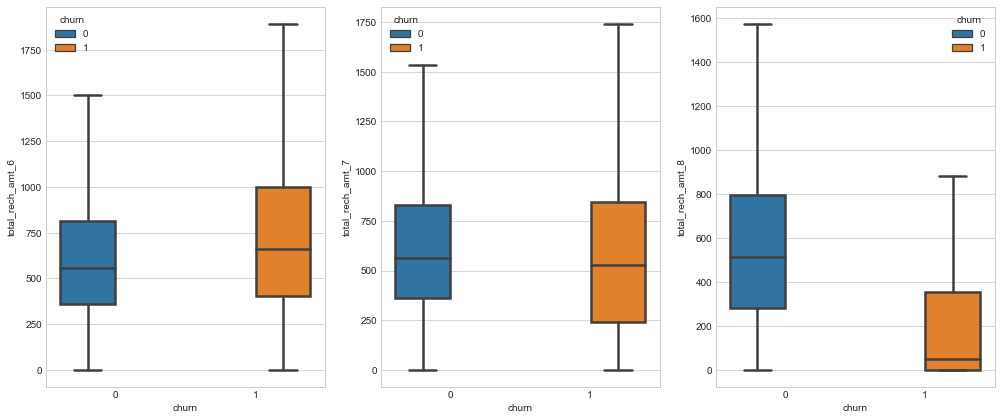

In [317]:
# Analyzing   recharge amount:
analyze_features('total_rech_amt')

We can  see  here a decrease  in the total recharge amount for churned customers.

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,460.70,545.73,498.19,1447.90,1500.10,1685.29
Non Churned,402.12,337.63,82.54,1047.33,1165.83,470.96


<Figure size 1224x504 with 0 Axes>

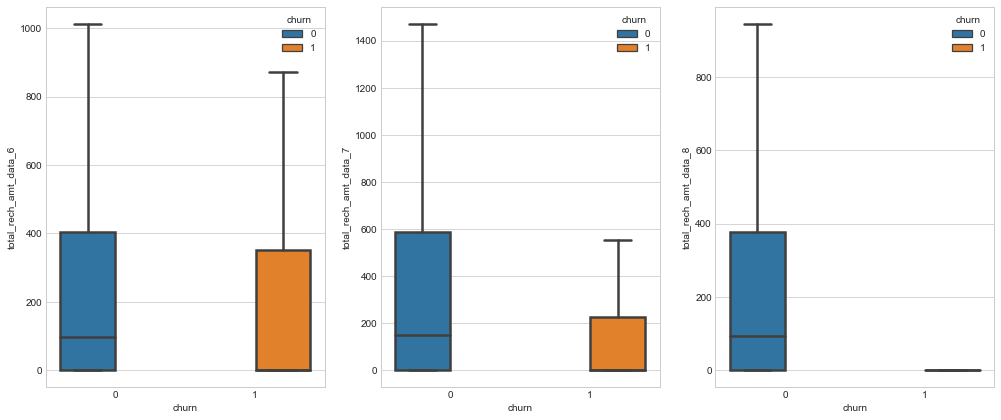

In [318]:
# let's analyze total recharge amount for data:
analyze_features('total_rech_amt_data')

We see that there is a significant drop in total recharge amount for data in 8th month (action phase) for churned customers.

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,168.85,173.23,166.78,171.50,176.37,170.97
Non Churned,173.98,161.00,87.89,212.49,228.85,180.84


<Figure size 1224x504 with 0 Axes>

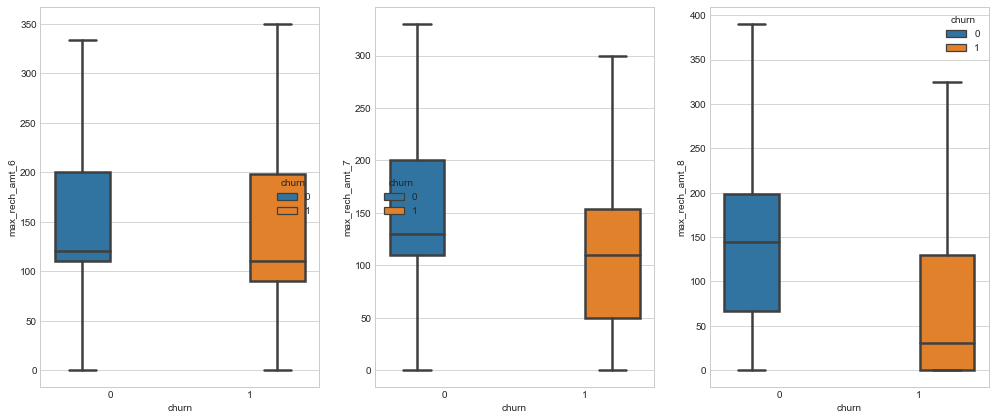

In [319]:
#  maximum recharge amount for data:
analyze_features('max_rech_amt')


We observe drop in maximum recharge amount as well.


In [320]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
telecom_df.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [321]:
telecom_df.shape

(30001, 171)

In [322]:
# Let us define 3 new derived columns
# total average recharge amount for good phase: total_rech_amt_good_ph
# total average recharge amount data for good phase: total_rech_amt_data_good_ph
# max average recharge amount for good phase: max_rech_amt_good_ph

telecom_df['total_rech_amt_good_ph'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_7)/2
telecom_df['total_rech_amt_data_good_ph'] = (telecom_df.total_rech_amt_data_6 + telecom_df.total_rech_amt_data_7)/2
telecom_df['max_rech_amt_good_ph'] = (telecom_df.max_rech_amt_6 + telecom_df.max_rech_amt_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
telecom_df.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

##### Last recharge amount

In [323]:
#let's extract the last day recharge amount columns
last_day_rech_amt = telecom_df.columns[telecom_df.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,100.36,102.08,97.35,140.19,138.95,145.09
Non Churned,106.67,81.52,38.43,177.76,159.67,134.92


<Figure size 1224x504 with 0 Axes>

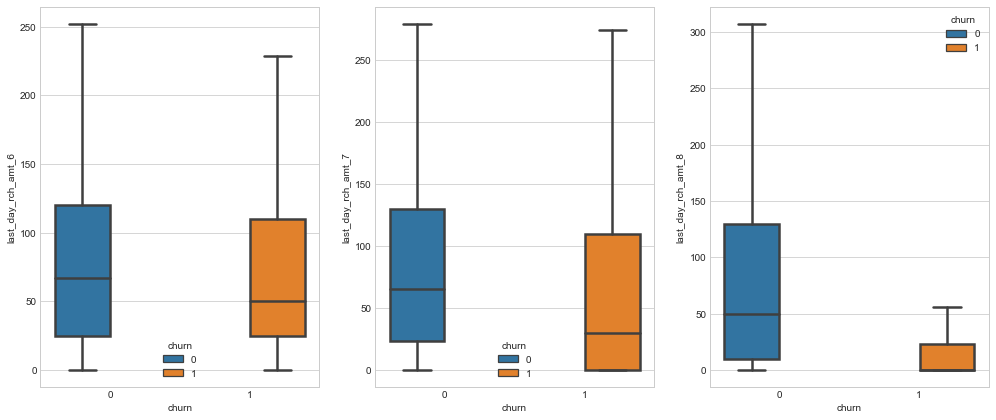

In [324]:
# let's check the mean variation in last day recharge for churned and non churned customers
analyze_features('last_day_rch_amt')

Here is also drop in last month recharge amount for churned customers.

In [325]:
# Let us define new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
telecom_df['last_day_rch_amt_good_ph'] = (telecom_df.last_day_rch_amt_6 + telecom_df.last_day_rch_amt_7)/2
# drop the original columns as these are not longer required
telecom_df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)


##### Recharge Related Variable

In [326]:
# Let's check other recharge related variables:
recharge_df = telecom_df.columns[telecom_df.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [327]:
# lets check the % of NA values for recharge related variables
100*telecom_df.loc[:,recharge_df].isnull().sum()/len(telecom_df)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [328]:
#  distribution for max_rech_data
telecom_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


here  minimum value is 1 while the max is 1555 across months, which implies the missing values are cases where there was no recharge for data, let's impute the missing values by 0 indicating no recharge.

In [329]:
telecom_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [330]:

# maximum recharge for data for good phase: max_rech_data_good_ph
telecom_df['max_rech_data_good_ph'] = (telecom_df.max_rech_data_6 + telecom_df.max_rech_data_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [331]:

# total recharge number for good phase: total_rech_num_good_ph
telecom_df['total_rech_num_good_ph'] = (telecom_df.total_rech_num_6 + telecom_df.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

##### 2G and 3G usage related variables

In [332]:
#let's extract the 2G and 3G usage related columns
typ_2g_3g = telecom_df.columns[telecom_df.columns.str.contains('2g|3g',regex=True)]

In [333]:
#let us check the % of NA values present
telecom_df.loc[:,typ_2g_3g].isnull().sum()/len(telecom_df.loc[:,typ_2g_3g])

count_rech_2g_6    0.441485
count_rech_2g_7    0.431452
count_rech_2g_8    0.468251
count_rech_3g_6    0.441485
count_rech_3g_7    0.431452
count_rech_3g_8    0.468251
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.441485
arpu_3g_7          0.431452
arpu_3g_8          0.468251
arpu_2g_6          0.441485
arpu_2g_7          0.431452
arpu_2g_8          0.468251
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

We see from above that about 60% values are not available for count of recharge and average revenue for 2G/3G per userwe already have column so we can drop 

In [334]:
telecom_df.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [335]:
#  2G and 3G usage columns
usage_3g_and_2g = telecom_df.columns[telecom_df.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(telecom_df.loc[:,usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     126.522185    125.097326    105.913072    344.258568    370.196701   
std      330.530793    331.548010    313.384838    913.747778    915.525911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.050000      0.000000      0.000000      0.000000   
75%       83.450000     77.770000     51.650000    358.740000    410.700000   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  30001.000000  
mean     351.493998  
std      919.021056  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      356.190000  
max    30036.060000  


In [336]:
# let's check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom_df.loc[telecom_df.churn==0,usage_3g_and_2g].mean()
              ,telecom_df.loc[telecom_df.churn==1,usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Churned,128.074912,128.464723,113.562745,350.312362,384.200039,375.776694
Non Churned,109.604104,88.407121,22.564389,278.298136,217.620278,86.916594



The 2G and 3G usage for churned customers drops in 8th month                                                                  

In [337]:
# Let us define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
telecom_df['vol_2g_mb_good_ph'] = (telecom_df.vol_2g_mb_6 + telecom_df.vol_2g_mb_7)/2
telecom_df['vol_3g_mb_good_ph'] = (telecom_df.vol_3g_mb_6 + telecom_df.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [338]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = telecom_df.columns[telecom_df.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# let's check the summary stats:
print(telecom_df.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.174494      0.183261      0.153628      0.217759      0.229026   
std        0.434953      0.450423      0.406486      0.613199      0.659125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  30001.000000  
mean       0.211026  
std        0.617549  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [339]:
# let's check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom_df.loc[telecom_df.churn==0,monthly_2g_3g].mean()
              ,telecom_df.loc[telecom_df.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Churned,0.182030,0.193675,0.165581,0.219950,0.237017,0.225227
Non Churned,0.092387,0.069786,0.023394,0.193894,0.141951,0.056305


There is a drop in monthly subscription for churned customers in action month (8th month) as compared ot non churned customers.

In [340]:
# Let us define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
telecom_df['monthly_2g_good_ph'] = (telecom_df.monthly_2g_6 + telecom_df.monthly_2g_7)/2
telecom_df['monthly_3g_good_ph'] = (telecom_df.monthly_3g_6 + telecom_df.monthly_3g_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

##### volume based cost

In [341]:
# let us rename month named vbc columns to 6,7,8,9 format
telecom_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_df.drop('vbc_3g_9',axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'vbc_3g_6', 7: 'vbc_3g_7', 8: 'vbc_3g_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,162.62,186.49,180.93,421.60,452.97,433.33
Non Churned,113.95,95.86,40.64,356.49,311.75,210.34


<Figure size 1224x504 with 0 Axes>

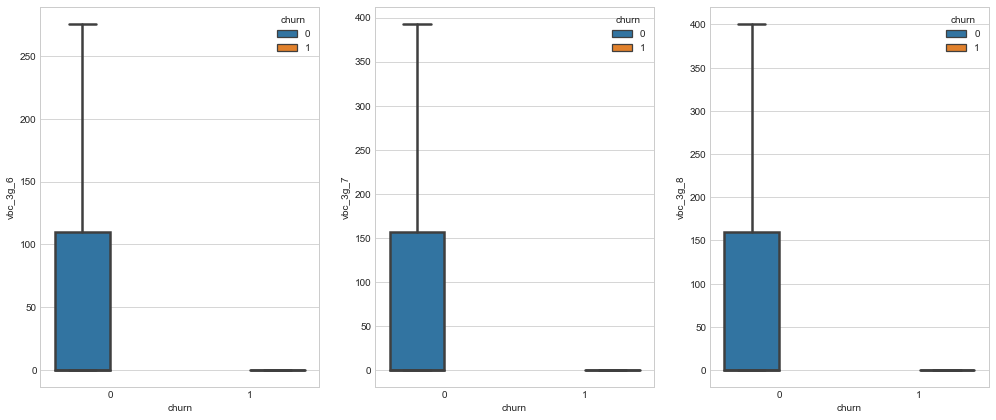

In [342]:
# let's check the volumne based cost for 3G
volumn_based_cost_3g = telecom_df.columns[telecom_df.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_features('vbc_3g')

The volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month.

In [343]:

# 3g volume based cost for good phase: vbc_3g_good_ph
telecom_df['vbc_3g_good_ph'] = (telecom_df['vbc_3g_6'] + telecom_df['vbc_3g_7'])/2

# drop the original columns as these are not longer required
telecom_df.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

##### Sachet subscription

In [344]:
# let's check sachet subscription for 2G/3G
sachet_2g_3g = telecom_df.columns[telecom_df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(telecom_df.loc[:,sachet_2g_3g].describe())

pd.DataFrame([telecom_df.loc[telecom_df.churn==0,sachet_2g_3g].mean()
              ,telecom_df.loc[telecom_df.churn==1,sachet_2g_3g].mean()],index={'Non Churned','Churned'})

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.066064      1.214026      1.054865      0.209393      0.227492   
std        2.507197      2.736158      2.535940      0.985674      1.089929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       42.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  30001.000000  
mean       0.202393  
std        1.100107  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Churned,1.069289,1.244368,1.127042,0.206703,0.228247,0.215110
Non Churned,1.030928,0.883426,0.268438,0.238699,0.219270,0.063838


There is a steep drop in sachet services in 8th month for churned cutsomers as compared to non churned customers

In [345]:

# 2G sachet for good phase: sachet_2g_good_ph
# 3G sachet for good phase: sachet_3g_good_ph
telecom_df['sachet_2g_good_ph'] = (telecom_df.sachet_2g_6 + telecom_df.sachet_2g_7)/2
telecom_df['sachet_3g_good_ph'] = (telecom_df.sachet_3g_6 + telecom_df.sachet_3g_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

##### date related variables

In [346]:
# extract the date columns
date = telecom_df.columns[telecom_df.columns.str.contains('date')]

# convert to datetime
for date_col in list(date):
    telecom_df[date_col]= pd.to_datetime(telecom_df[date_col])

In [347]:
print(telecom_df.last_date_of_month_6.dt.day.unique(),telecom_df.last_date_of_month_7.dt.day.unique()
      ,telecom_df.last_date_of_month_8.dt.day.unique())

# as only 1 unique value last day of month is present these columns are not adding much information

telecom_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31. nan] [31. nan]


In [348]:
# let's extract the day of last recharge
telecom_df['day_of_last_rech_6'] =  telecom_df.date_of_last_rech_6.dt.day
telecom_df['day_of_last_rech_7'] =  telecom_df.date_of_last_rech_7.dt.day
telecom_df['day_of_last_rech_8'] =  telecom_df.date_of_last_rech_8.dt.day

last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([telecom_df.loc[telecom_df.churn==0,last_rech_cols].median()
              ,telecom_df.loc[telecom_df.churn==1,last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Churned,28.0,29.0,29.0
Non Churned,28.0,27.0,26.0


We can see that the median value for last recharge is bit lower for churned customers

In [349]:
# let's define a new derived column indicating the shift in day of last recharge

telecom_df['day_of_last_rech_shift'] = telecom_df.day_of_last_rech_8 -(telecom_df.day_of_last_rech_6+telecom_df.day_of_last_rech_7)/2

In [350]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([telecom_df.loc[telecom_df.churn==0,['day_of_last_rech_shift']].median()
              ,telecom_df.loc[telecom_df.churn==1,['day_of_last_rech_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_shift
Churned,0.5
Non Churned,-2.0


We can clearly see that a large negative shift is indicating churn

In [351]:
#  delete the other colummns derived as are no longer required
telecom_df.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [352]:
# let's extract the day of last recharge for data
telecom_df['day_of_last_rech_data_6'] =  telecom_df.date_of_last_rech_data_6.dt.day
telecom_df['day_of_last_rech_data_7'] =  telecom_df.date_of_last_rech_data_7.dt.day
telecom_df['day_of_last_rech_data_8'] =  telecom_df.date_of_last_rech_data_8.dt.day

last_rech_cols = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([telecom_df.loc[telecom_df.churn==0,last_rech_cols].median()
              ,telecom_df.loc[telecom_df.churn==1,last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Churned,22.0,24.0,23.0
Non Churned,23.0,20.0,15.0


In [353]:
# let's define a new derived column indicating the shift in day of last data recharge

telecom_df['day_of_last_rech_data_shift'] = telecom_df.day_of_last_rech_data_8 -(telecom_df.day_of_last_rech_data_6+telecom_df.day_of_last_rech_data_7)/2

In [354]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([telecom_df.loc[telecom_df.churn==0,['day_of_last_rech_data_shift']].median()
              ,telecom_df.loc[telecom_df.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_shift
Churned,-0.5
Non Churned,-6.0


In [355]:
# let's delete the other colummns derived as are no longer required
telecom_df.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [356]:
#  drop the date columns as we have derived day of month variables from them
telecom_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
telecom_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [357]:
telecom_df.shape

(30001, 137)

##### average revenue per user

Churn Stats (mean and standard deviation):
{6: 'arpu_6', 7: 'arpu_7', 8: 'arpu_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,549.23,562.86,533.26,447.05,474.10,504.14
Non Churned,659.36,538.11,239.87,579.28,537.32,386.45


<Figure size 1224x504 with 0 Axes>

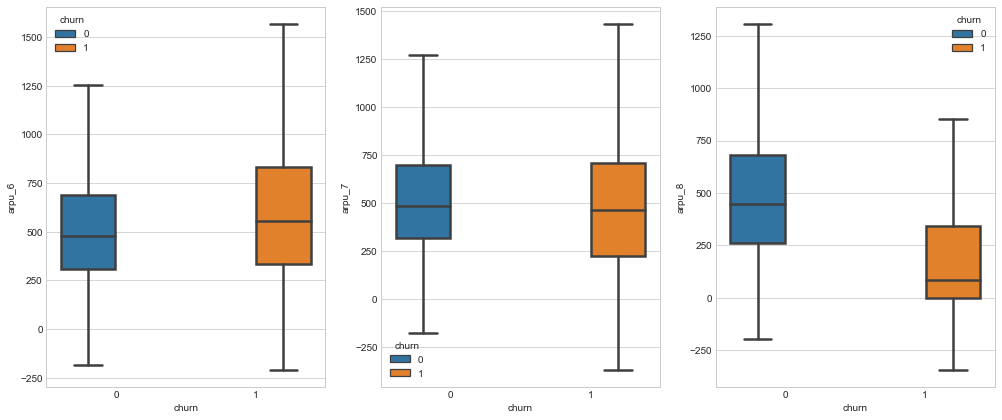

In [358]:
# extract columns for average revenue per user
arpu_cols = telecom_df.columns[telecom_df.columns.str.contains('arpu_')]

# analyze arpu
analyze_features('arpu')

We can see that arpu also drops signficantly in action phase for churned customers

In [359]:
# Let us define new derived columns
# arpu for good phase: arpu_good_ph
telecom_df['arpu_good_ph'] = (telecom_df.arpu_6 + telecom_df.arpu_7)/2
# drop the original columns as these are not longer required
telecom_df.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

##### Minutes of Usage related variables

In [360]:
# let's derive minutes of usage columns
mou_cols = telecom_df.columns[telecom_df.columns.str.contains('mou')]
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [361]:
# let's check if there are any zero variation columns among these
zero_var_cols = telecom_df.loc[:,mou_cols].std()[telecom_df.loc[:,mou_cols].std()==0].index.values

zero_var_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [362]:
# let's drop these columns
telecom_df.drop(list(zero_var_cols),axis=1,inplace=True)

In [363]:
# let's check the % of null values among mou variables
mou_cols = telecom_df.columns[telecom_df.columns.str.contains('mou')]
(100*telecom_df.loc[:,mou_cols].isnull().sum()/len(telecom_df.loc[:,mou_cols])).sort_values(ascending=False)

isd_ic_mou_8        3.913203
loc_og_t2m_mou_8    3.913203
spl_og_mou_8        3.913203
std_og_mou_8        3.913203
std_og_t2f_mou_8    3.913203
std_og_t2m_mou_8    3.913203
loc_ic_t2t_mou_8    3.913203
std_og_t2t_mou_8    3.913203
loc_ic_t2m_mou_8    3.913203
loc_og_mou_8        3.913203
loc_ic_t2f_mou_8    3.913203
loc_og_t2c_mou_8    3.913203
loc_ic_mou_8        3.913203
isd_og_mou_8        3.913203
std_ic_t2t_mou_8    3.913203
loc_og_t2f_mou_8    3.913203
std_ic_t2m_mou_8    3.913203
onnet_mou_8         3.913203
loc_og_t2t_mou_8    3.913203
spl_ic_mou_8        3.913203
std_ic_t2f_mou_8    3.913203
roam_og_mou_8       3.913203
std_ic_mou_8        3.913203
offnet_mou_8        3.913203
roam_ic_mou_8       3.913203
roam_ic_mou_6       1.816606
std_og_mou_6        1.816606
offnet_mou_6        1.816606
std_og_t2f_mou_6    1.816606
roam_og_mou_6       1.816606
                      ...   
roam_og_mou_7       1.789940
std_ic_mou_7        1.789940
loc_og_t2f_mou_7    1.789940
loc_og_t2t_mou

So, for all minutes of usage columns the maximum missing % is 3.19 which seems that in these cases the mobile has not been used at all for that particular call type(ic,std etc.), thus it is safe to assume that we can impute the missing values with zero.

In [364]:
# replaceing null values by 0 for minutes of usage variables
telecom_df.loc[:,mou_cols] = telecom_df.loc[:,mou_cols].replace(np.NaN,0)

Lets now now analyze the sub groups of minutes of usage, following groups are there:
                                                                                                                               
og: outgoing calls                                                                                                           ic: incoming calls                                                                                                                                                                                                                                             Let us start by analyzing minutes for usage variables for month 6

In [365]:
# let's collect mou variables for month 6
mou_6 = telecom_df.columns[telecom_df.columns.str.contains('mou_6')]
mou_6

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [366]:
# Let's check the outgoing mou variables.

mou_og_cols6 = telecom_df.columns[telecom_df.columns.str.contains('.*_og_.*mou_6',regex=True)]

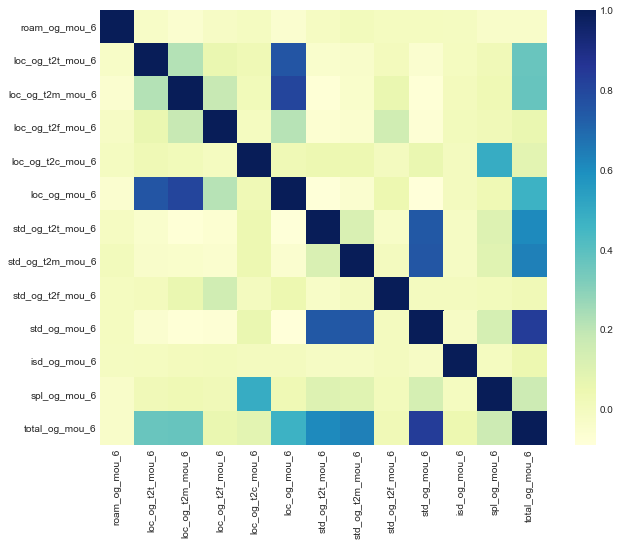

In [367]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(telecom_df.loc[:,mou_og_cols6].corr(), cmap="YlGnBu")
plt.show()

After analyzing the variables, we acertain the following rlationships among variables:                                         

total_og_mou_6 = loc_og_mou_6+std_og_mou_6+spl_og_mou_6+isd_og_mou_6+ roam_og_mou_6+og_others_6                                 
std_og_mou_6 = std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6 + std_og_2tc_mou_6                                           
loc_og_mou_6 = loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6 + loc_og_2tc_mou_6

In [368]:
print(telecom_df.loc[7,'total_og_mou_6'],telecom_df.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

print(telecom_df.loc[7,'std_og_mou_6'],telecom_df.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())

print(telecom_df.loc[7,'loc_og_mou_6'],telecom_df.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

487.53 487.52000000000004
60.86 60.849999999999994
422.16 422.15


In [369]:
# As total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

total_og_cols = telecom_df.columns[telecom_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(total_og_cols)

telecom_df.drop(total_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [370]:
# let's define good phase derived variables for all og components:
telecom_df['spl_og_mou_good_ph'] = (telecom_df.spl_og_mou_6 + telecom_df.spl_og_mou_7)/2
telecom_df['isd_og_mou_good_ph'] = (telecom_df.isd_og_mou_6 + telecom_df.isd_og_mou_7)/2
telecom_df['roam_og_mou_good_ph'] = (telecom_df.roam_og_mou_6 + telecom_df.roam_og_mou_7)/2
telecom_df['std_og_t2m_mou_good_ph'] = (telecom_df.std_og_t2m_mou_6 + telecom_df.std_og_t2m_mou_7)/2
telecom_df['std_og_t2t_mou_good_ph'] = (telecom_df.std_og_t2t_mou_6 + telecom_df.std_og_t2t_mou_7)/2
telecom_df['std_og_t2f_mou_good_ph'] = (telecom_df.std_og_t2f_mou_6 + telecom_df.std_og_t2f_mou_7)/2

telecom_df['loc_og_t2m_mou_good_ph'] = (telecom_df.loc_og_t2m_mou_6 + telecom_df.loc_og_t2m_mou_7)/2
telecom_df['loc_og_t2t_mou_good_ph'] = (telecom_df.loc_og_t2t_mou_6 + telecom_df.loc_og_t2t_mou_7)/2
telecom_df['loc_og_t2f_mou_good_ph'] = (telecom_df.loc_og_t2f_mou_6 + telecom_df.loc_og_t2f_mou_7)/2
telecom_df['loc_og_t2c_mou_good_ph'] = (telecom_df.loc_og_t2c_mou_6 + telecom_df.loc_og_t2c_mou_7)/2

In [371]:
# drop all the original og mou variables
ls_og = telecom_df.columns[telecom_df.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

telecom_df.drop(ls_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
       'spl_og_mou_7'],
      dtype='object')


##### Let's check for incoming mou variables

In [372]:
ic_cols6 = telecom_df.columns[telecom_df.columns.str.contains('.*_ic_.*mou_6',regex=True)]

ic_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

As with og mou variables above, we observe the following relationship among ic (incoming)mou variables:

total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + roam_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6                       
loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6                                           
std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2c_mou_6                                         

In [373]:
print(telecom_df.loc[7,'total_ic_mou_6'],telecom_df.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

print(telecom_df.loc[7,'loc_ic_mou_6'],telecom_df.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())

print(telecom_df.loc[7,'std_ic_mou_6'],telecom_df.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

626.46 626.92
427.88 427.86
180.54 180.51999999999998


In [374]:
# As total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_ic_cols = telecom_df.columns[telecom_df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

telecom_df.drop(ls_total_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [375]:
# let's define good phase derive variables for all ic components:
telecom_df['spl_ic_mou_good_ph'] = (telecom_df.spl_ic_mou_6 + telecom_df.spl_ic_mou_7)/2
telecom_df['isd_ic_mou_good_ph'] = (telecom_df.isd_ic_mou_6 + telecom_df.isd_ic_mou_7)/2
telecom_df['roam_ic_mou_good_ph'] = (telecom_df.roam_ic_mou_6 + telecom_df.roam_ic_mou_7)/2
telecom_df['std_ic_t2m_mou_good_ph'] = (telecom_df.std_ic_t2m_mou_6 + telecom_df.std_ic_t2m_mou_7)/2
telecom_df['std_ic_t2t_mou_good_ph'] = (telecom_df.std_ic_t2t_mou_6 + telecom_df.std_ic_t2t_mou_7)/2
telecom_df['std_ic_t2f_mou_good_ph'] = (telecom_df.std_ic_t2f_mou_6 + telecom_df.std_ic_t2f_mou_7)/2

telecom_df['loc_ic_t2m_mou_good_ph'] = (telecom_df.loc_ic_t2m_mou_6 + telecom_df.loc_ic_t2m_mou_7)/2
telecom_df['loc_ic_t2t_mou_good_ph'] = (telecom_df.loc_ic_t2t_mou_6 + telecom_df.loc_ic_t2t_mou_7)/2
telecom_df['loc_ic_t2f_mou_good_ph'] = (telecom_df.loc_ic_t2f_mou_6 + telecom_df.loc_ic_t2f_mou_7)/2

In [376]:
# drop all the original og mou variables
ls_ic = telecom_df.columns[telecom_df.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

telecom_df.drop(ls_ic,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')


##### offnet usage

In [377]:
offnet_cols = telecom_df.columns[telecom_df.columns.str.contains('offnet',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,364.92,377.79,352.68,463.15,489.51,490.20
Non Churned,469.29,381.51,143.30,650.11,591.94,325.64


<Figure size 1224x504 with 0 Axes>

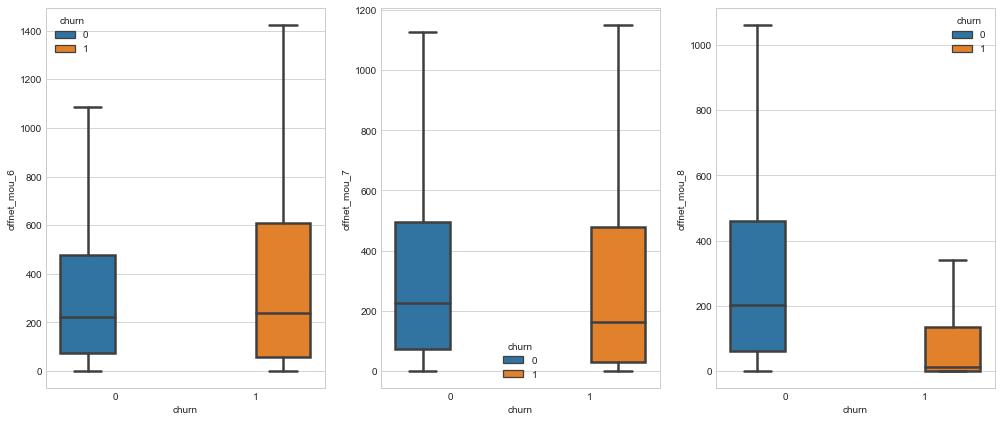

In [378]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_features('offnet_mou')

There is a substantial decrease in offnet mou for action month.

In [379]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom_df['offnet_mou_good_ph'] = (telecom_df.offnet_mou_6 + telecom_df.offnet_mou_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

##### minutes of usage related variables within same operator network

In [380]:
#let's extract the minutes of usage related columns
onnet_cols =  telecom_df.columns[telecom_df.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,250.86,265.59,244.98,441.95,474.22,466.25
Non Churned,369.03,292.15,115.71,610.30,538.45,341.05


<Figure size 1224x504 with 0 Axes>

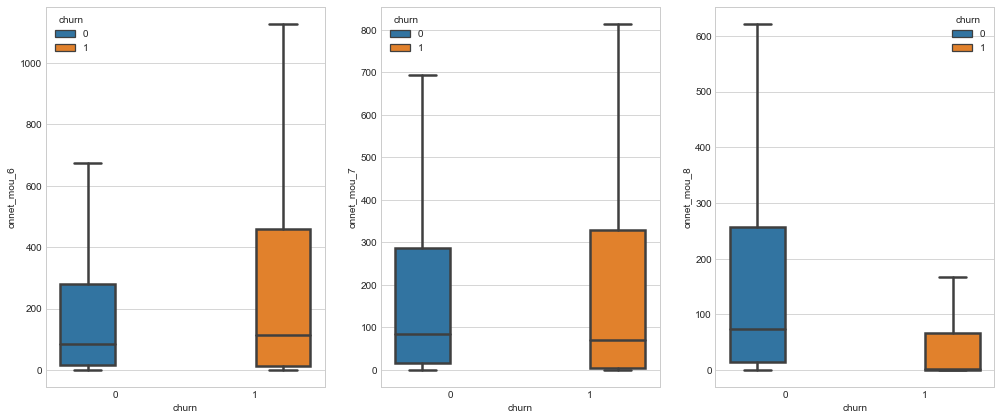

In [381]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_features('onnet_mou')

We again see that there is a drop in minutes of usage in the action month (8th month) for churned customers

In [382]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom_df['onnet_mou_good_ph'] = (telecom_df.onnet_mou_6 + telecom_df.onnet_mou_7)/2

# drop the original columns as these are not longer required
telecom_df.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [383]:
# let's check summary stats for oc others and ic others mou
ls_others = telecom_df.columns[telecom_df.columns.str.contains('_others')]

print(telecom_df.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean       0.673323      0.043687      0.059953      1.174790      1.527682   
std        4.144797      2.701071      3.381939     14.113843     16.141140   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  28827.000000  
mean       1.274322  
std       13.038515  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


In [384]:
# Let us define two new derived columns
# OG others for good phase: og_others_good_ph
# IC otherd for good phase: ic_others_good_ph
telecom_df['og_others_good_ph'] = (telecom_df.og_others_6 + telecom_df.og_others_7)/2
telecom_df['ic_others_good_ph'] = (telecom_df.ic_others_6 + telecom_df.ic_others_6)/2


# drop the original columns as these are not longer required
telecom_df.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

Let's check if there are any more columns with more than 20% NA values remaining

In [385]:
is_more_than_20 = telecom_df.isnull().sum()/len(telecom_df) > 0.2
100*telecom_df.loc[:,is_more_than_20].isnull().sum()/len(telecom_df.loc[:,is_more_than_20])

night_pck_user_6               44.148528
night_pck_user_7               43.145228
night_pck_user_8               46.825106
fb_user_6                      44.148528
fb_user_7                      43.145228
fb_user_8                      46.825106
day_of_last_rech_data_shift    59.904670
dtype: float64

In [386]:
# lets drop these columns as we have already captured internet volume usage and total data amount recharged.
# also we have captured day of last recharge shift as well.
telecom_df.drop(telecom_df.columns[is_more_than_20],axis=1,inplace=True)

In [387]:
# let's check how many variables are remaining!!
telecom_df.shape

(30001, 79)

In [388]:
is_na = telecom_df.isnull().sum()/len(telecom_df) > 0
100*telecom_df.loc[:,is_na].isnull().sum()/len(telecom_df.loc[:,is_na])

og_others_8               3.913203
ic_others_8               3.913203
day_of_last_rech_shift    2.306590
og_others_good_ph         2.606580
ic_others_good_ph         1.816606
dtype: float64

We can observe that these have very few values a NA indicating that there is no usage in these variables by customer. Let's impute these values by 0.

In [389]:
telecom_df.loc[:,:] = telecom_df.loc[:,:].replace(np.NaN,0)

### 3. Model Building


In [390]:
# Putting feature variable to X
X = telecom_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df['churn']

###### Additional feature 
We will do some additional feature transformation to achieve better accuracy in our predictive model. We know from EDA above that a drop in action phase parameter as compared to good phase value is highly indicative of a likely churn, let's use this heuristic to derive action phase column which is actually the difference between good phase feature value and action phase (8th month) feature value and discard the 8th month feature columns.

In [391]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [392]:
# define function to calculate difference between 8th month feature and good phase feature
def Diff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)

In [393]:
# create a feature data frame copy from original features
X_diff = X.copy()

In [394]:
# extract features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [395]:
# create new derived columns for action phase.
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(Diff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [396]:
# drop 8th month columns as we have already derived action phase columns.
X_diff.drop(f_8,axis=1,inplace=True)

###### Feature Standardisation

In [397]:
# import standard scalar
from sklearn.preprocessing import StandardScaler

# extract columns
cols = X_diff.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X_diff)

# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [398]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,stratify = y,test_size=0.3,random_state=100)

Let's define a function to print out evaluation metrics, as we have customer churn as positive class (1) we would try to maximize sensitivity at the same time trying to keep auc_score at a good level.

In [399]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))

In [400]:
# let's start by building as basic logistic regression model
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()

In [401]:
lsr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [402]:
# predict results on test
y_pred = lsr.predict(X_test)

In [403]:
# print model evaluation metrics
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[8124  120]
 [ 557  200]]
Sensitivity:  0.26420079260237783
Specificity:  0.9854439592430859
AUC Score:  0.6248223759227318
Precision:  0.625
f1 Score:  0.3714020427112349


We do see from above that the sesitivity and auc score is pretty low, this is because the data imbalanced with only 8.4% values for churn. We will do imbalanced class handling to rectify this.

Imbalanced class handling                                                                                                                                                                                                                                                                                                        
In this section we will try to reduce class imbalance by trying out a techniques:

SMOTE resampling: by generating synthetic samples for the minority class.

SMOTE resampling

In [404]:
# import SMOTE sampler from imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular", random_state=42)

In [405]:
# SMOTE sampling the training data
X_sm_1, y_sm_1 = smote.fit_sample(X_train, y_train)

In [406]:
# function to undersample majority class
def UnderSampler(X_train,y_train):
    # create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    # create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [407]:
# create majority class undersampled data frame from training data
df_train_mju = UnderSampler(X_train,y_train)

# extract features and labels
X_sm = df_train_mju.drop('churn',axis=1)
y_sm = df_train_mju.churn

In [408]:
lsr = LogisticRegression()
lsr.fit(X_sm_1,y_sm_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [409]:
y_pred = lsr.predict(X_test)
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[6768 1476]
 [ 128  629]]
Sensitivity:  0.8309114927344782
Specificity:  0.8209606986899564
AUC Score:  0.8259360957122173
Precision:  0.298812351543943
f1 Score:  0.43955276030747725


###   PCA(Dimenesionality Reduction)
The  number of features are quite high, so we can try dimensionality reduction with PCA and try model creation on reduced feature set.

In [410]:
from sklearn.decomposition import PCA

In [411]:
pca = PCA(svd_solver='randomized', random_state=101)

In [412]:
pca.fit(X_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
  svd_solver='randomized', tol=0.0, whiten=False)

In [413]:
# let's check the features with top PCA components
colnames = list(X_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,9.931789e-17,-2.259283e-18,circle_id
1,-4.744304e-02,2.352869e-01,aon
2,-2.594614e-02,-2.013111e-01,total_rech_amt_good_ph
3,7.033504e-01,2.180866e-01,total_rech_amt_data_good_ph
4,7.183415e-03,-1.888802e-03,max_rech_amt_good_ph


Let's draw a scree plot to determine number of features which capture the highest variance.

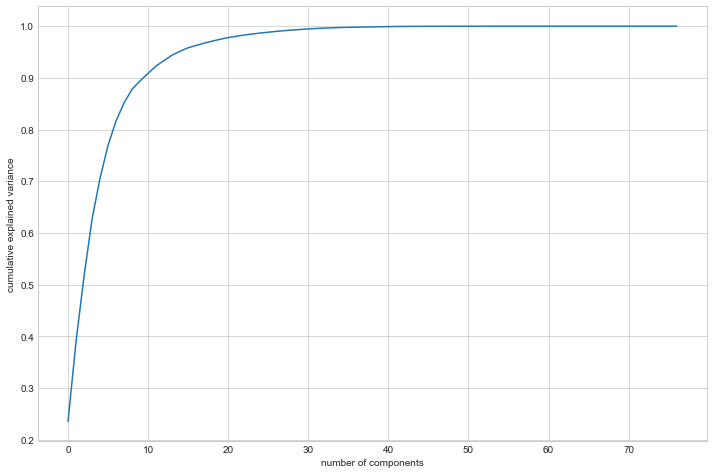

In [414]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We see from above that around ~ 60 features capture 90% variance, let's reduce our feature set to 60

In [415]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [416]:
X_train_pca = pca_final.fit_transform(X_sm)

X_train_pca.shape

(3530, 40)

In [417]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

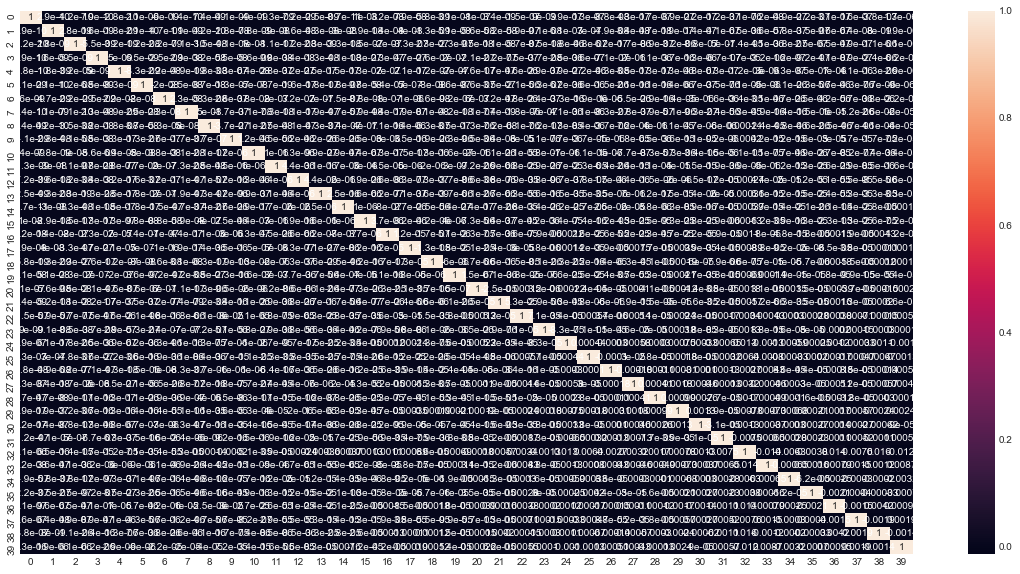

In [418]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (40,20))
sns.heatmap(corrmat,annot = True)

In [419]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,y_sm)

In [420]:
y_pred = lr_pca.predict(X_test_pca)

In [421]:
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[6555 1689]
 [ 126  631]]
Sensitivity:  0.8335535006605019
Specificity:  0.7951237263464338
AUC Score:  0.8143386135034679
Precision:  0.27198275862068966
f1 Score:  0.4101397465063374


##### Adjusting probability threshold cutoff for logistic regression
We will now try to select the optimum probability threshold for our model

In [422]:
# check the predicted probabilities
y_pred_prob = lr_pca.predict_proba(X_test_pca)

In [423]:
# create predicted probability data frame
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [424]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn,ID,Churn_Prob
0,0,70035,0.283846
1,0,34027,0.000019
2,0,75694,0.014927
3,1,99132,0.786691
4,0,87483,0.001149


In [425]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,churn,Churn_Prob
0,70035,0,0.283846
1,34027,0,0.000019
2,75694,0,0.014927
3,99132,1,0.786691
4,87483,0,0.001149


In [426]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,70035,0,0.283846,1,1,1,0,0,0,0,0,0,0
1,34027,0,0.000019,1,0,0,0,0,0,0,0,0,0
2,75694,0,0.014927,1,0,0,0,0,0,0,0,0,0
3,99132,1,0.786691,1,1,1,1,1,1,1,1,0,0
4,87483,0,0.001149,1,0,0,0,0,0,0,0,0,0


In [427]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.084102  0.000000  1.000000  0.084102
0.1   0.1  0.393623  0.341339  0.963012  0.118363
0.2   0.2  0.532163  0.494663  0.940555  0.145961
0.3   0.3  0.638929  0.613780  0.912814  0.178323
0.4   0.4  0.721698  0.707909  0.871863  0.215124
0.5   0.5  0.798356  0.795124  0.833554  0.271983
0.6   0.6  0.860127  0.869238  0.760898  0.348247
0.7   0.7  0.899345  0.920184  0.672391  0.436161
0.8   0.8  0.919231  0.958758  0.488771  0.521127
0.9   0.9  0.920009  0.985808  0.203435  0.568266


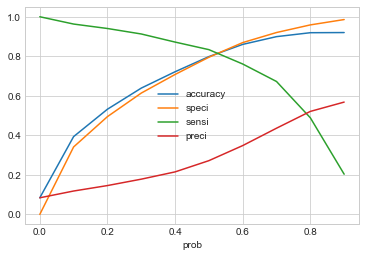

In [428]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [429]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

#### Baseline Model

In [430]:
#Let's check the overall accuracy.
printMetrics(y_pred_final.churn, y_pred_final.final_predicted)

Confusion Matrix: 
 [[6625 1619]
 [ 127  630]]
Sensitivity:  0.8322324966974901
Specificity:  0.8036147501213003
AUC Score:  0.8179236234093952
Precision:  0.28012449977767895
f1 Score:  0.4191616766467065


The above is our baseline model, which has been created
Now in sections below we will create multiple models where we would try to maximize the sensitivity and f1 score.



#### Decision Tree: AdaBoost Model


In [431]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [432]:
# create a shallow tree
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [433]:
# estimating the optimum number of estimators
estimators = list(range(40, 150, 10))

auc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_sm, y_sm)
    y_pred = ABC.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    auc_scores.append(score)

In [434]:
# check the auc scores
auc_scores

[0.8359973740158968,
 0.8367924761100823,
 0.834946371469391,
 0.837251077922569,
 0.8432362962663853,
 0.8408908893029445,
 0.8445099498326153,
 0.8434448463219237,
 0.8454130524934029,
 0.8423464933786359,
 0.8375277292255943]

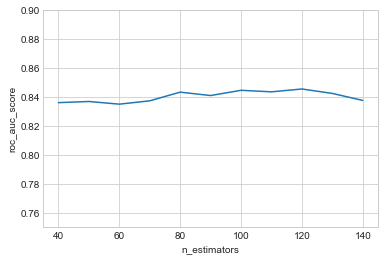

In [435]:
# plot test scores and n_estimators
plt.plot(estimators, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc_score')
plt.ylim([0.75, 0.9])
plt.show()

In [436]:
# create model for the best n estimators value
ABC = AdaBoostClassifier(n_estimators=120,base_estimator=shallow_tree)

In [437]:
# fit the model
ABC.fit(X_sm,y_sm)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1.0, n_estimators=120, random_state=None)

In [438]:
# check prediction on test set
y_pred_abc =  ABC.predict(X_test)

In [439]:
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[6900 1344]
 [ 111  646]]
Sensitivity:  0.8533685601056803
Specificity:  0.8369723435225619
AUC Score:  0.8451704518141211
Precision:  0.3246231155778894
f1 Score:  0.4703312704768838


#### Gradient Boosting Model

In [440]:
from sklearn.ensemble import GradientBoostingClassifier

In [441]:
# create parameter grid for learning rate and subsample
# parameter grid
param_grid = {"learning_rate": [0.1,0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [442]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [443]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=3)

grid_search_GBC.fit(X_sm, y_sm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:   22.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'learning_rate': [0.1, 0.2, 0.6, 0.9], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [444]:
# check the best parameters obtained
grid_search_GBC.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [445]:
# run gradient boosting with optimum parameters
GBC = GradientBoostingClassifier(learning_rate=0.1,subsample=0.3)

# fit and predict
GBC.fit(X_sm,y_sm)
y_pred_abc =  GBC.predict(X_test)
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[7053 1191]
 [ 115  642]]
Sensitivity:  0.8480845442536328
Specificity:  0.8555312954876274
AUC Score:  0.85180791987063
Precision:  0.3502454991816694
f1 Score:  0.4957528957528958


Note: multiple parameters were tuned at this stage but the most relevant one was found to be scale_pos_weight which can be used to apply weightage to minority class.

In [446]:
# import xgboost libraries
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [447]:
# first build default xgboost model
XGB = XGBClassifier()

XGB.fit(X_sm,y_sm)
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_abc)

Confusion Matrix: 
 [[7053 1191]
 [ 115  642]]
Sensitivity:  0.8480845442536328
Specificity:  0.8555312954876274
AUC Score:  0.85180791987063
Precision:  0.3502454991816694
f1 Score:  0.4957528957528958


In [448]:
# creating a KFold cross validation 
folds = 3

# specify range of hyperparameters
param_grid = {'scale_pos_weight': [1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=3)

In [449]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'scale_pos_weight': [1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [450]:
# check the best parameters
model_cv.best_params_

{'scale_pos_weight': 1.87}

In [451]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':1,
         'objective':'binary:logistic',
          'scale_pos_weight': 1.87}

# fit model on training data
XGB = XGBClassifier(params = params)
XGB.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 1, 'objective': 'binary:logistic', 'scale_pos_weight': 1.87},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [452]:
# check the preddiction
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_xgb)

Confusion Matrix: 
 [[7098 1146]
 [ 110  647]]
Sensitivity:  0.8546895640686922
Specificity:  0.8609898107714702
AUC Score:  0.8578396874200813
Precision:  0.3608477412158394
f1 Score:  0.5074509803921569


We can increase the sensitivity a bit by trading off slightly on f1 score, let's increase scale_pos_weight to 1.9

In [453]:
XGB = XGBClassifier(scale_pos_weight=2.05)

XGB.fit(X_sm,y_sm)
y_pred_xgb =  XGB.predict(X_test)
printMetrics(y_test,y_pred_xgb)

Confusion Matrix: 
 [[6533 1711]
 [  69  688]]
Sensitivity:  0.9088507265521797
Specificity:  0.7924551188743328
AUC Score:  0.8506529227132562
Precision:  0.2867861609003752
f1 Score:  0.4359949302915082


#### Ensemble Model creation

Here we will create an ensemble model using decision trees, random forest, linear regression and Linear SVM model.

In [454]:
# load the required libraries
from sklearn.tree import DecisionTreeClassifier

In [455]:
# set hyper parameters
grid_search_best_params_ = {'max_depth': 13,
                            'max_features': 25,
                            'min_samples_leaf': 95,
                            'min_samples_split': 20,
                            'random_state': 10}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_sm, y_sm)
printMetrics(y_test, dtree.predict(X_test))

Confusion Matrix: 
 [[6540 1704]
 [ 187  570]]
Sensitivity:  0.7529722589167768
Specificity:  0.7933042212518195
AUC Score:  0.7731382400842981
Precision:  0.25065963060686014
f1 Score:  0.3761134938964038


In [456]:
# import linear SVM
from sklearn.svm import LinearSVC

# Build linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y_sm)
printMetrics(y_test, SVM.predict(X_test_pca))

Confusion Matrix: 
 [[5699 2545]
 [ 256  501]]
Sensitivity:  0.6618229854689565
Specificity:  0.6912906356137797
AUC Score:  0.6765568105413682
Precision:  0.16447800393959291
f1 Score:  0.26347620299763347


In [457]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
RF = RandomForestClassifier(**grid_search_best_params_, n_estimators=20)
RF.fit(X_sm, y_sm)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[6881 1363]
 [ 161  596]]
Sensitivity:  0.7873183619550859
Specificity:  0.8346676370693837
AUC Score:  0.8109929995122347
Precision:  0.3042368555385401
f1 Score:  0.4388807069219441


In [458]:
# build logistic regression model
LR = LogisticRegression()
LR.fit(X_sm, y_sm)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[6881 1363]
 [ 161  596]]
Sensitivity:  0.7873183619550859
Specificity:  0.8346676370693837
AUC Score:  0.8109929995122347
Precision:  0.3042368555385401
f1 Score:  0.4388807069219441


Finally we will build ensemble mode below.

In [459]:
ENSEMBLE_MODEL_pred = list(map(lambda x: 1 if (sum(x)>=2) else 0, zip(LR.predict(X_test),
                                                          dtree.predict(X_test),            
                                                          RF.predict(X_test),                                                          
                                                          SVM.predict(X_test_pca))))
printMetrics(y_test, ENSEMBLE_MODEL_pred)

Confusion Matrix: 
 [[6345 1899]
 [ 122  635]]
Sensitivity:  0.8388375165125496
Specificity:  0.769650655021834
AUC Score:  0.8042440857671918
Precision:  0.2505919494869771
f1 Score:  0.3859009419629292


##### Summary of prediction
Summary of the model scores obtained on test data:
Baseline Model: Sensitivity:0.83|Specificity:0.809|f1 score:0.43 |auc score: 0.82                   
Best Model (XgBoost):Sensitivity:0.90|Specificity:0.80|f1 score:0.46|auc score: 0.86
##### Understanding the parameters for Customer Churn
The parameters for customer churn and if any corrective action that can be taken by operator.We will be using the following approach:
Create logistic regression model without doing PCA on complete feature set.
remove initial unimportant features by doing a LASSO penalty, also tune alpha for the process.
On reduced feature set model obtained above do further reduction in features using p-value and VIF.
Obtain final model to do the analysis for churn.

In [460]:
# import stats model
import statsmodels.api as sm

In [461]:
# Putting feature variable to X
X = telecom_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df['churn']

In [462]:
# extract columns
cols = X.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X)

# convert to data frame
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [463]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,stratify = y,random_state=100)

# create majority class undersampled data frame from training data
df_train_maj = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_maj.drop('churn',axis=1)
y_mju = df_train_maj.churn

In [464]:
X_mju = X_mju.drop('circle_id', axis=1)
X_mju.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph
12,-0.217408,-0.450729,0.742578,-0.135591,-0.142819,-0.289999,-0.534659,-0.301836,-0.236923,-0.337564,...,-0.209234,-0.201966,-0.153405,-0.648422,-0.331624,-0.353049,1.262497,-0.487613,-0.142046,-0.082473
22,-0.517464,-0.454764,-0.493092,0.773156,0.984980,-0.343393,-0.649485,-0.301836,0.455362,-0.373383,...,0.023108,-0.132415,-0.153405,0.205996,0.347626,-0.353049,0.905546,0.214684,-0.142046,-0.028847
29,-0.492549,-0.091468,-0.545243,1.645343,2.368992,-0.343393,-0.649485,-0.301836,-0.236923,-0.373383,...,-0.319392,-0.100704,-0.153405,0.084378,-0.259369,-0.321706,-0.659542,1.318201,-0.095360,-0.082473
30,1.312444,2.888633,-0.252248,1.201492,4.842223,0.118586,-0.083656,-0.301836,0.139047,2.058741,...,0.177329,0.157247,-0.153405,-0.458254,-0.074419,-0.310770,-0.406879,2.617215,0.560287,-0.082473
37,-0.641902,-0.349167,-0.320082,-0.078255,-0.081798,-0.150579,-0.092515,-0.301836,-0.236923,-0.303003,...,0.864244,-0.171054,-0.153405,1.158408,0.013935,-0.308628,0.052666,-0.384695,-0.142046,1.356854


In [465]:
X_test=X_test.drop('circle_id', axis=1)

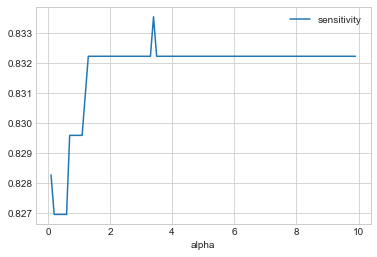

In [466]:
## Lasso Regression Feature Selection
possible_alpha = [i/10 for i in range(1, 100)]
alpha_sensitivity = []

for alpha in possible_alpha:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    lassolr.fit(X_mju, y_mju)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alpha_sensitivity.append({"alpha": alpha, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alpha_sensitivity).plot.line(x='alpha', y='sensitivity')

From above we can see that sensitivity is maximized for alpha = 3. Let's run model with LASSO<br> 
(l1) penalty and drop all features with zero coefficients.

In [467]:
# run with alpha=0.4 and penalty = 'l1'
lassolr = LogisticRegression(C=3, penalty='l1', solver='liblinear')
lassolr.fit(X_mju, y_mju)
LR_coefs = dict(zip(X_mju.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{'onnet_mou_8': 0.0, 'onnet_mou_good_ph': 0.0}

We will now create our model,  create a function to train model and print the model metricsand  VIF values with the additional facility to drop columns which are passed in 'cols_to_drop' parameter of the function.

In [468]:
# function to test model, print metrics, VIF score and can drop columns
def test_model(x_train, x_test, y_train, y_test, cols_to_drop = None):
    cols_to_drop = cols_to_drop or []
    x_train = x_train.drop(cols_to_drop, axis=1)
    x_test = x_test.drop(cols_to_drop, axis=1)
    lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    print("Scoring on TEST {}, TRAIN {}".format(lr.score(x_test,y_test), lr.score(x_train,y_train)))
    printMetrics(y_test,lr.predict(x_test))
    x_train = sm.add_constant(x_train)
    stat_model = sm.Logit(y_train, x_train).fit_regularized(method='l1')
    print(stat_model.summary())
    # calculate VIF
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    for i, var in enumerate(x_train.columns):
        ## Even if we are doing a logistic regression above
        ## Do a Linear Regression here as we are just trying 
        ## to fing the variance of the features, how multicollinear
        rsq = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - rsq + 0.00000000001), 2)
        vif_df.loc[i] = [var, vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [469]:
# run model on majority undersampled training data
test_model(X_mju, X_test, y_mju, y_test)

Scoring on TEST 0.8151316520386623, TRAIN 0.8254957507082153
Confusion Matrix: 
 [[6707 1537]
 [ 127  630]]
Sensitivity:  0.8322324966974901
Specificity:  0.8135613779718583
AUC Score:  0.8228969373346743
Precision:  0.29072450392247345
f1 Score:  0.43091655266757867
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41242219855053747
            Iterations: 434
            Function evaluations: 434
            Gradient evaluations: 434
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3530
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                           76
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.4050
Time:                        20:02:00   Log-Likelihood:                -1455.9
converged:                       True   LL-

,Var,Vif
2,onnet_mou_8,7363.92
3,offnet_mou_8,6759.60
10,std_og_t2t_mou_8,5641.40
11,std_og_t2m_mou_8,4309.57
74,onnet_mou_good_ph,3042.03
73,offnet_mou_good_ph,2591.34
58,std_og_t2t_mou_good_ph,2427.34
57,std_og_t2m_mou_good_ph,2108.94
7,loc_og_t2m_mou_8,1450.83
6,loc_og_t2t_mou_8,1257.08


##### Dropping variables with high p-value and high VIF

In [470]:
#here we will drop that variable whose having high VIF
cols_to_drop=["onnet_mou_8", "std_og_t2m_mou_8", "onnet_mou_good_ph",
       "offnet_mou_good_ph", "roam_ic_mou_good_ph", "loc_og_t2m_mou_good_ph",
      "og_others_8", "total_rech_amt_good_ph", "total_rech_amt_8", "isd_ic_mou_good_ph",
      "arpu_8", "vol_3g_mb_8", "loc_og_t2f_mou_good_ph", "isd_og_mou_8",
      "loc_ic_t2f_mou_good_ph", "spl_og_mou_good_ph", "std_ic_t2m_mou_good_ph",
      "std_og_t2f_mou_good_ph", "total_rech_amt_data_good_ph", "max_rech_data_good_ph",
      "std_ic_t2f_mou_good_ph", "loc_og_t2f_mou_8", "vbc_3g_good_ph", "isd_og_mou_good_ph",
      "total_rech_amt_data_8", "max_rech_amt_good_ph", "total_rech_num_good_ph",
      "sachet_2g_good_ph", "ic_others_8", "std_ic_t2f_mou_8", "og_others_good_ph",
      "ic_others_good_ph", "roam_ic_mou_8", "monthly_3g_good_ph", "loc_ic_t2m_mou_8",
      "loc_ic_t2m_mou_good_ph", "isd_ic_mou_8", "loc_og_t2c_mou_good_ph", "last_day_rch_amt_good_ph",
      "std_og_t2f_mou_8", "sachet_3g_good_ph", "sachet_3g_8", "std_og_t2t_mou_good_ph",
      "spl_ic_mou_good_ph", "loc_og_t2c_mou_8", "spl_og_mou_8", "vbc_3g_8",
      "vol_3g_mb_good_ph", "roam_og_mou_good_ph", "monthly_2g_8", "monthly_3g_8",
      "loc_og_t2t_mou_good_ph", "loc_og_t2t_mou_8", "max_rech_amt_8", "spl_ic_mou_8",
      "std_ic_t2t_mou_good_ph", "std_ic_t2m_mou_8", "std_ic_t2t_mou_8","std_og_t2m_mou_good_ph"]


LR_FEATURES = list(set(X_mju.columns) - set(cols_to_drop))

In [471]:
test_model(X_mju, X_test, y_mju, y_test, cols_to_drop=cols_to_drop)

Scoring on TEST 0.8012443061882013, TRAIN 0.8101983002832861
Confusion Matrix: 
 [[6592 1652]
 [ 137  620]]
Sensitivity:  0.8190224570673712
Specificity:  0.7996118389131489
AUC Score:  0.8093171479902601
Precision:  0.272887323943662
f1 Score:  0.4093760316936283
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.450914658552242
            Iterations: 69
            Function evaluations: 70
            Gradient evaluations: 69
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3530
Model:                          Logit   Df Residuals:                     3512
Method:                           MLE   Df Model:                           17
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.3495
Time:                        20:02:08   Log-Likelihood:                -1591.7
converged:                       True   LL-Null:   

,Var,Vif
5,loc_ic_t2t_mou_8,2.22
17,loc_ic_t2t_mou_good_ph,2.16
1,offnet_mou_8,1.77
13,vol_2g_mb_good_ph,1.69
7,total_rech_num_8,1.69
10,vol_2g_mb_8,1.66
3,loc_og_t2m_mou_8,1.64
11,sachet_2g_8,1.32
0,const,1.31
8,last_day_rch_amt_8,1.30


From the above, we can directly see that train accuracy coming out is 82% and test accuracy coming out is 79.5%.

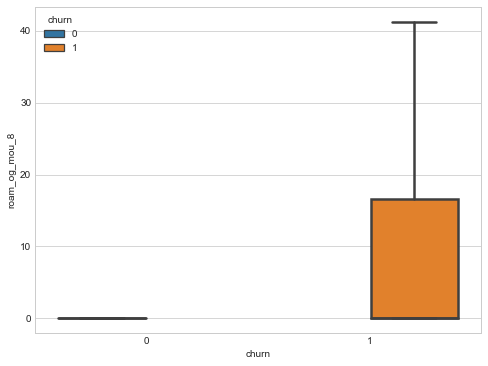

In [472]:
## Variables with positive coef
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
# High variance in Roam Outgoing Minutes of Usage, => probability of churn is high 
# if roaming minutes of usage increases. Same is apparent from the positive coef of the LR model
sns.boxplot(data=telecom_df, y="roam_og_mou_8", x="churn", hue="churn", linewidth=2.5, showfliers=False)

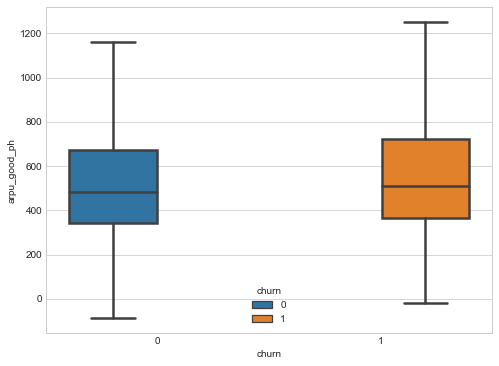

In [473]:
# High variance in ARPU of 8th month, => Customers are using some costly feature => high probability of churn
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
sns.boxplot(data=telecom_df, y="arpu_good_ph", x="churn", hue="churn", linewidth=2.5, showfliers=False)

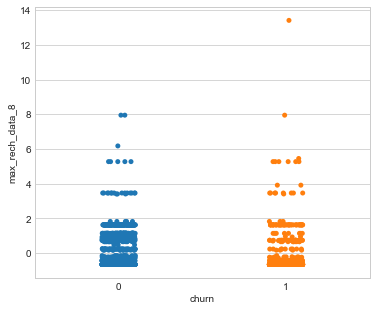

In [474]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.stripplot(x="churn", y="max_rech_data_8", data=df_train_maj, jitter=True)

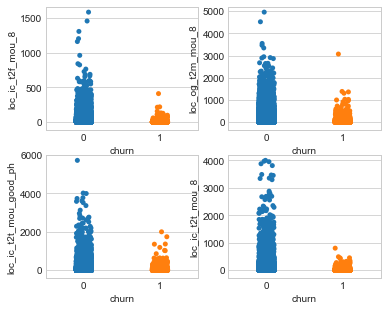

In [475]:
f,axes = plt.subplots(nrows=2, ncols=2)

sns.stripplot(x="churn", y="loc_ic_t2f_mou_8", data=telecom_df, jitter=True, ax=axes[0][0])
sns.stripplot(x="churn", y="loc_og_t2m_mou_8", data=telecom_df, jitter=True, ax=axes[0][1])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_good_ph", data=telecom_df, jitter=True, ax=axes[1][0])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_8", data=telecom_df, jitter=True, ax=axes[1][1])

In [476]:
# vol 2g/3g usage
ls_3g_2g = telecom_df.columns[telecom_df.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]

# let's check the mean variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom_df.loc[telecom_df.churn==0,ls_3g_2g].mean()
              ,telecom_df.loc[telecom_df.churn==1,ls_3g_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_good_ph,vol_3g_mb_good_ph
Churned,113.562745,375.776694,128.269817,367.256201
Non Churned,22.564389,86.916594,99.005613,247.959207


## Analysis


- If the local incoming calls for t2t drop in action phase then there are high chances of default.

- Local outgoing calls from telecom operator to other network mobile indicates a high possibility of customer churn.

- A drop in 2G usage volume of sachet top-ups is also highly indicative of churn.

- The maximum data recharge done by customer drops in action phase then it also indicates a tendency to default.

- A drop in calls from fixed line to customer is also highly suggestive of churn.

- If  the last recharge is not in the last week of month then this behaviour is also highly indicative of churn.

- If there is an increase in outgoing roaming calls can cause customer churn from the operator, this might be because customer is incurring high roaming charges and hence would want to switch to a local number.

Apart from the above model based features we have also noticed in EDA that the % of churn is higher for 2G usage as compared to 3G usage suggesting that some users may be migrating to other operators due to availability of better 3G network.

Also, in some cases there is a small increase in calls to call centre in 7th month followed by drop in 8th month, which indicates that customers might be calling for some issues based on which they might have left the network.


###### Based on modeling our recommendations to reduce customer churn:
- Lower tariffs on data usage
- Lower roaming charges
- They need to provide good offers to the customers who are using services from a roaming zone
- Provide good rate cutter tarrif for STD  and ISD calls
